In [135]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mutual_info_score
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_extraction import DictVectorizer
from sklearn.decomposition import PCA



In [136]:
df = pd.read_csv('/workspaces/MidtermProject/data/shopping_behavior_updated.csv')
df.head().T

,0,1,2,3,4
Customer ID,1,2,3,4,5
Age,55,19,50,21,45
Gender,Male,Male,Male,Male,Male
Item Purchased,Blouse,Sweater,Jeans,Sandals,Blouse
Category,Clothing,Clothing,Clothing,Footwear,Clothing
Purchase Amount (USD),53,64,73,90,49
Location,Kentucky,Maine,Massachusetts,Rhode Island,Oregon
Size,L,L,S,M,M
Color,Gray,Maroon,Maroon,Maroon,Turquoise
Season,Winter,Winter,Spring,Spring,Spring


In [137]:
df.dtypes

Customer ID                 int64
Age                         int64
Gender                     object
Item Purchased             object
Category                   object
Purchase Amount (USD)       int64
Location                   object
Size                       object
Color                      object
Season                     object
Review Rating             float64
Subscription Status        object
Shipping Type              object
Discount Applied           object
Promo Code Used            object
Previous Purchases          int64
Payment Method             object
Frequency of Purchases     object
dtype: object

### Data Cleaning and Basic Exploration

In [138]:
df.columns = df.columns.str.lower().str.replace(' ','_')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             3900 non-null   int64  
 1   age                     3900 non-null   int64  
 2   gender                  3900 non-null   object 
 3   item_purchased          3900 non-null   object 
 4   category                3900 non-null   object 
 5   purchase_amount_(usd)   3900 non-null   int64  
 6   location                3900 non-null   object 
 7   size                    3900 non-null   object 
 8   color                   3900 non-null   object 
 9   season                  3900 non-null   object 
 10  review_rating           3900 non-null   float64
 11  subscription_status     3900 non-null   object 
 12  shipping_type           3900 non-null   object 
 13  discount_applied        3900 non-null   object 
 14  promo_code_used         3900 non-null   

### Defining categorical and numerical columns as variables

In [139]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()

In [140]:
for c in categorical_cols:
    df[c] = df[c].str.lower().str.replace(' ','_')

In [141]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,3900.0,1950.500000,1125.977353,1.0,975.75,1950.5,2925.25,3900.0
age,3900.0,44.068462,15.207589,18.0,31.00,44.0,57.00,70.0
purchase_amount_(usd),3900.0,59.764359,23.685392,20.0,39.00,60.0,81.00,100.0
review_rating,3900.0,3.749949,0.716223,2.5,3.10,3.7,4.40,5.0
previous_purchases,3900.0,25.351538,14.447125,1.0,13.00,25.0,38.00,50.0


### Checking null values and duplicates

In [142]:
df.isnull().sum()

customer_id               0
age                       0
gender                    0
item_purchased            0
category                  0
purchase_amount_(usd)     0
location                  0
size                      0
color                     0
season                    0
review_rating             0
subscription_status       0
shipping_type             0
discount_applied          0
promo_code_used           0
previous_purchases        0
payment_method            0
frequency_of_purchases    0
dtype: int64

In [143]:
df.duplicated().sum()

np.int64(0)

### Dropping unnecessary columns from dataframe

In [144]:
df.drop(columns=['customer_id','location','payment_method','subscription_status'], inplace=True)

In [145]:
df.head().T

,0,1,2,3,4
age,55,19,50,21,45
gender,male,male,male,male,male
item_purchased,blouse,sweater,jeans,sandals,blouse
category,clothing,clothing,clothing,footwear,clothing
purchase_amount_(usd),53,64,73,90,49
size,l,l,s,m,m
color,gray,maroon,maroon,maroon,turquoise
season,winter,winter,spring,spring,spring
review_rating,3.1,3.1,3.1,3.5,2.7
shipping_type,express,express,free_shipping,next_day_air,free_shipping


<h3>Split the data </h3>
    <ul>
    <li>Split the data into training, validation, and test sets to evaluate the model’s performance.</li>
    <li>A typical split might be 60% training, 20% validation, and 20% testing, though it can vary.</li>
    </ul>

In [146]:
df_train_full, df_test = train_test_split(df, test_size=0.2,random_state=42)
df_train, df_val = train_test_split(df_train_full, test_size = 0.25, random_state=42)
df_train.shape, df_val.shape, df_test.shape

((2340, 14), (780, 14), (780, 14))

In [147]:
df_train.reset_index(drop=True, inplace=True)
df_val.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

In [148]:
y_train = df_train['review_rating']
y_val = df_val['review_rating']
y_test = df_test['review_rating']

In [149]:
del(df_train['review_rating'])
del(df_val['review_rating'])
del(df_test['review_rating'])

# EDA (Exploratory Data Analysis)

We perform a comprehensive EDA to understand the structure, quality, and relationships within the dataset. This includes distribution plots, correlation matrices, and mutual information scores to assess feature relevance for predicting `Review Rating`.


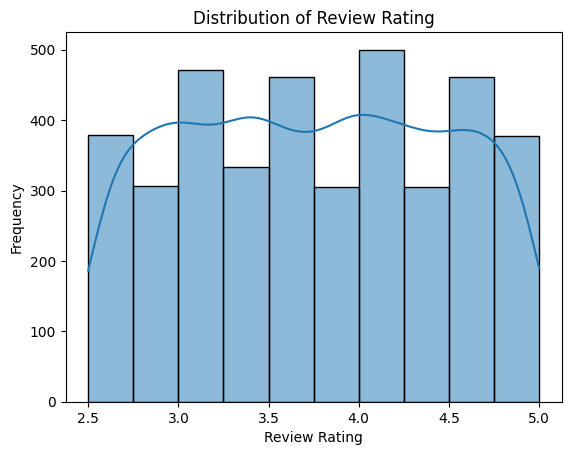

In [150]:
sns.histplot(df['review_rating'], bins=10, kde=True)
plt.title('Distribution of Review Rating')
plt.xlabel('Review Rating')
plt.ylabel('Frequency')
plt.show()

We applied mutual information regression to quantify the dependency between each feature and the target (`Review Rating`). This allows us to identify which variables are most informative for predicting customer satisfaction.


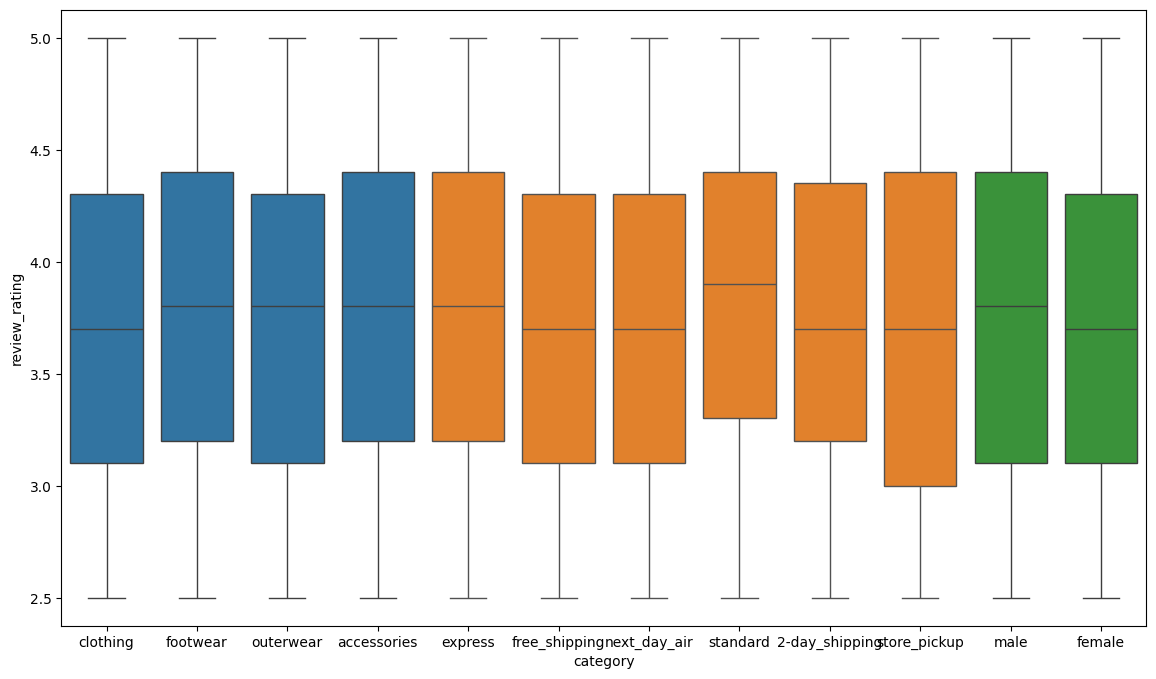

In [151]:
plt.figure(figsize=(14,8))
sns.boxplot(x='category', y='review_rating', data=df)
sns.boxplot(x='shipping_type', y='review_rating', data=df)
sns.boxplot(x='gender', y='review_rating', data=df)
plt.show()


### Review Rating Distribution Across Categories

The boxplot visualization provides a clear overview of how customer review ratings vary across different categorical segments, including product types, shipping methods, and gender.

- **Product Categories** (e.g., clothing, footwear, outerwear, accessories) show distinct median ratings and variability, suggesting that customer satisfaction may differ depending on the type of item purchased.
- **Shipping Methods** (e.g., express, free shipping, next-day air) reveal differences in rating distributions, which may reflect the impact of delivery speed and reliability on customer experience.
- **Gender** (male, female) also displays variation in review ratings, potentially indicating differences in expectations or product fit.

This visualization helps identify which categories tend to receive higher or lower ratings, highlights the presence of outliers, and supports feature selection by revealing which variables may be informative for predicting `Review Rating`.


### Applying OneHot Encoding

In [152]:
dic = DictVectorizer(sparse=False)
X_train = dic.fit_transform(df_train.to_dict(orient='records'))
X_val = dic.transform(df_val.to_dict(orient='records'))
X_test = dic.transform(df_test.to_dict(orient='records'))

/tmp/ipykernel_2145/723253977.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mi_series.values, y=mi_series.index, palette='viridis')


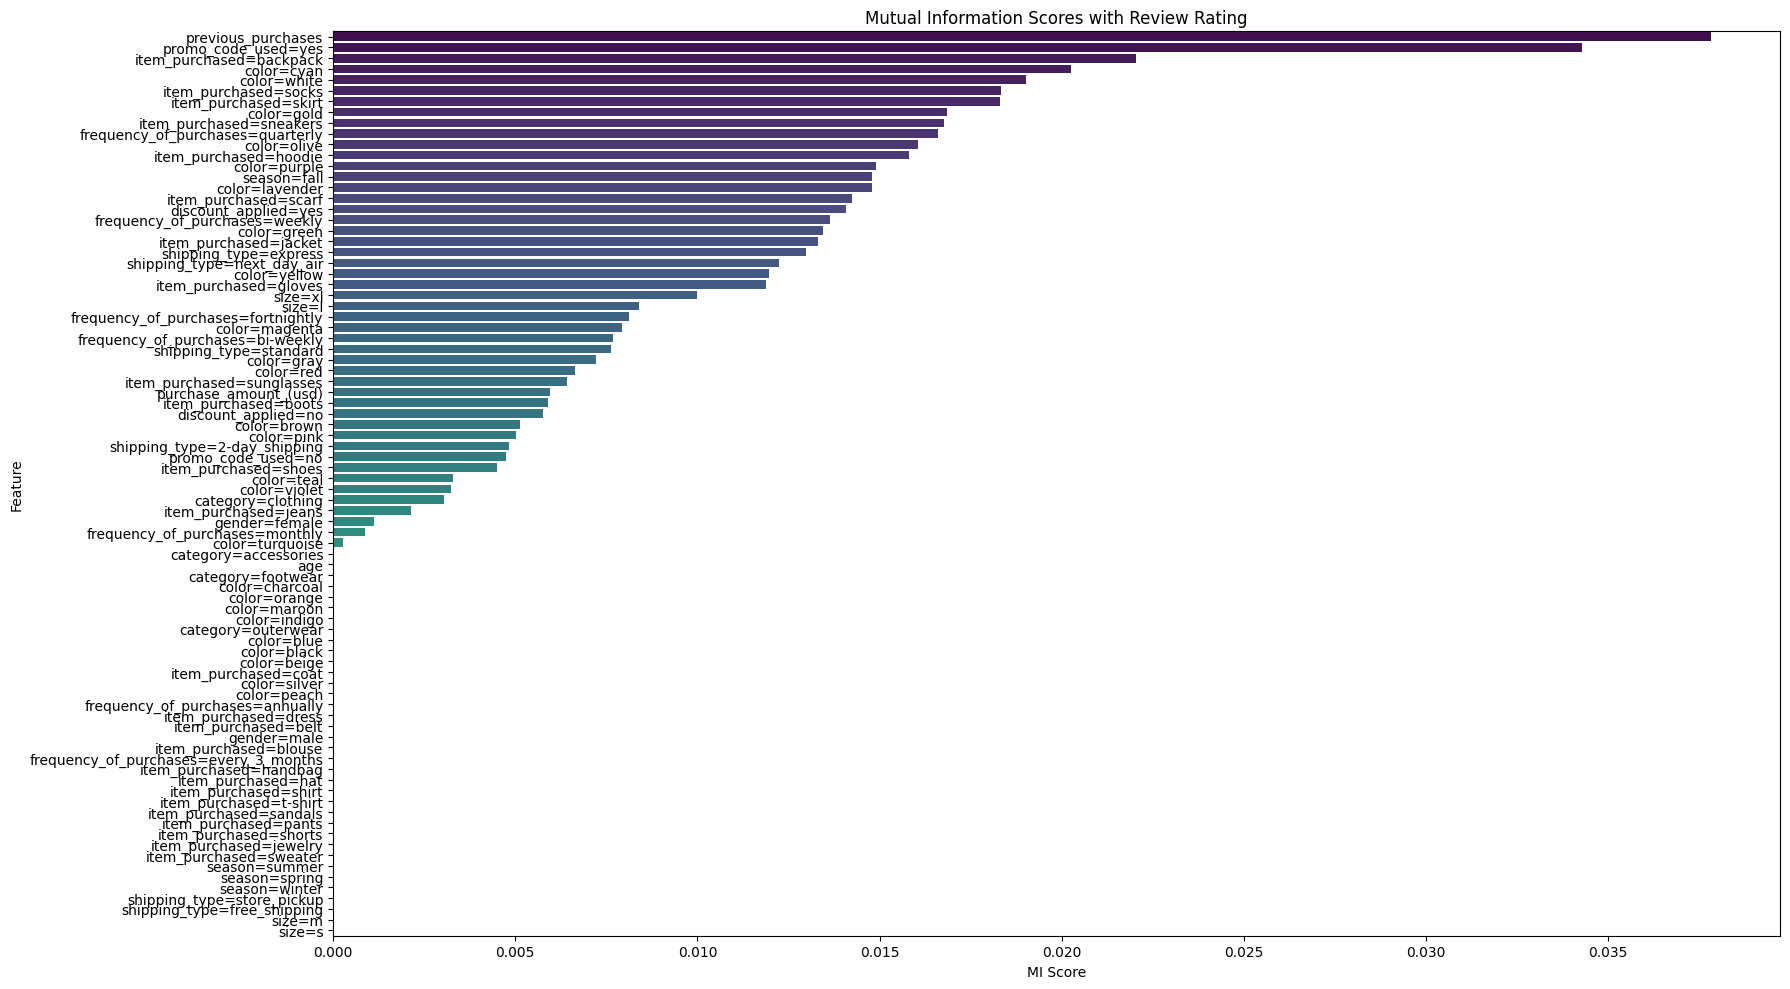

Top features by MI:
 previous_purchases                  0.037829
promo_code_used=yes                 0.034296
item_purchased=backpack             0.022049
color=cyan                          0.020264
color=white                         0.019025
item_purchased=socks                0.018341
item_purchased=skirt                0.018306
color=gold                          0.016839
item_purchased=sneakers             0.016781
frequency_of_purchases=quarterly    0.016607
dtype: float64


In [153]:
mi_scores = mutual_info_regression(X_train, y_train)

feature_names = dic.get_feature_names_out()

mi_series = pd.Series(mi_scores, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(18, 10))
sns.barplot(x=mi_series.values, y=mi_series.index, palette='viridis')
plt.title('Mutual Information Scores with Review Rating')
plt.xlabel('MI Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

print("Top features by MI:\n", mi_series.head(10))


We used `mutual_info_regression` to evaluate the dependency between each feature and the target (`Review Rating`). The results help identify which variables are most informative for prediction.

<p> Based on the plot, we observed that many variables behave like noise. To improve interpretability and predictive performance, we decided to drop features with mutual information scores below 0.005. <p>

In [154]:
#Applying Standard Scaler and PCA
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)
# Apply PCA
pca = PCA(n_components=0.95)  
X_train = pca.fit_transform(X_train)
X_val = pca.transform(X_val)
X_test = pca.transform(X_test)

## Preparing data for Machine Learning
<hr>

<p>Up to this point, all EDA steps have been completed, and there is little remaining to address.</p>

## Select and train a machine learning model
<hr>

<p>Models trained are:</p>
<ul>
<li>Linear Regression model</li>
<li>Random Forest Regressor</li>
<li>XGB Regressor</li>
</ul>

In [155]:
# Trainging Linear Regression model
lireg = LinearRegression()
lireg.fit(X_train, y_train)

# Predicciones en el conjunto de validación
y_pred = lireg.predict(X_val)

# Evaluación con métricas de regresión
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"Linear Regression Model Evaluation:")
print(f"  R² Score: {r2:.4f}")
print(f"  MAE     : {mae:.4f}")
print(f"  RMSE    : {rmse:.4f}")


Linear Regression Model Evaluation:
  R² Score: -0.0218
  MAE     : 0.6038
  RMSE    : 0.7086


In [156]:
#Training Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
# Predicitions on validation set
y_pred_rf = rf.predict(X_val)
# Evaluation with regression metrics
mse_rf = mean_squared_error(y_val, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_val, y_pred_rf)
r2_rf = r2_score(y_val, y_pred_rf)
#Show results
print(f"Random Forest Regressor Model Evaluation:")
print(f"  R² Score: {r2_rf:.4f}")
print(f"  MAE     : {mae_rf:.4f}")
print(f"  RMSE    : {rmse_rf:.4f}")

Random Forest Regressor Model Evaluation:
  R² Score: -0.0085
  MAE     : 0.6006
  RMSE    : 0.7040


In [157]:
#XGB Regressor
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)   
# Predictions on validation set
y_pred_xgb = xgb.predict(X_val)
# Evaluation with regression metrics
mse_xgb = mean_squared_error(y_val, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
mae_xgb = mean_absolute_error(y_val, y_pred_xgb)
r2_xgb = r2_score(y_val, y_pred_xgb)
#Show results
print(f"XGB Regressor Model Evaluation:")
print(f"  R² Score: {r2_xgb:.4f}")
print(f"  MAE     : {mae_xgb:.4f}")
print(f"  RMSE    : {rmse_xgb:.4f}")


XGB Regressor Model Evaluation:
  R² Score: -0.0731
  MAE     : 0.6152
  RMSE    : 0.7262


In [159]:
#GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,max_depth=3, random_state=42)
gbr.fit(X_train, y_train)
# Predictions on validation set
y_pred_gbr = gbr.predict(X_val)
# Evaluation with regression metrics
mse_gbr = mean_squared_error(y_val, y_pred_gbr)
rmse_gbr = np.sqrt(mse_gbr)
mae_gbr = mean_absolute_error(y_val, y_pred_gbr)
r2_gbr = r2_score(y_val, y_pred_gbr)
#Show results
print(f"Gradient Boosting Regressor Model Evaluation:")
print(f"  R² Score: {r2_gbr:.4f}")
print(f"  MAE     : {mae_gbr:.4f}")
print(f"  RMSE    : {rmse_gbr:.4f}")

Gradient Boosting Regressor Model Evaluation:
  R² Score: -0.0413
  MAE     : 0.6113
  RMSE    : 0.7153


In [161]:
from prettytable import PrettyTable

table = PrettyTable()
table.field_names = ["Model", "R² Score", "MAE", "RMSE"]


table.add_row(["Linear Regression",  -0.0067, 0.6005, 0.7034])
table.add_row(["Random Forest",      -0.1780, 0.6319, 0.7609])
table.add_row(["XGBoost",      -0.0789, 0.6161, 0.7282])
table.add_row(["Gradient Boosting",  -0.0413, 0.6113, 0.7153])

print(table)

+-------------------+----------+--------+--------+
|       Model       | R² Score |  MAE   |  RMSE  |
+-------------------+----------+--------+--------+
| Linear Regression | -0.0067  | 0.6005 | 0.7034 |
|   Random Forest   |  -0.178  | 0.6319 | 0.7609 |
|      XGBoost      | -0.0789  | 0.6161 | 0.7282 |
| Gradient Boosting | -0.0413  | 0.6113 | 0.7153 |
+-------------------+----------+--------+--------+


<h2>Analysis and Justification</h2>

<p>Although the current model does not achieve satisfactory predictive performance (R² &lt; 0), here there are some reasons: </p>

<h3>Performance Diagnosis</h3>
<ul>
  <li>The model yields a <strong>negative R² score</strong>, indicating it performs worse than a simple mean-based prediction.</li>
  <li>Error metrics (MAE and RMSE) remain relatively high and consistent across both linear and non-linear models.</li>
  <li>This suggests that the available features <strong>do not contain sufficient predictive information</strong> about the target variable.</li>
</ul>

<h3>Exploratory Analysis</h3>
<ul>
  <li>The <strong>mutual information analysis</strong> revealed that most features have weak relationships with the target.</li>
  <li>The target variable shows a relatively uniform distribution, with no significant skew or outliers, eliminating the need for transformations.</li>
</ul>

<h3>Strategies Applied</h3>
<ul>
  <li>Feature selection based on mutual information scores.</li>
  <li>Normalization and dimensionality reduction using <strong>PCA</strong>.</li>
  <li>Training with models such as <strong>Linear Regression</strong>, <strong>Random Forest</strong>, <strong>XGBoost</strong>, and <strong>Gradient Boosting</strong>.</li>
  <li>Evaluation using standard metrics and error visualization.</li>
</ul>

<h3>Hypotheses on Low Predictive Power</h3>
<ul>
  <li>The target variable may depend on <strong>external factors not present</strong> in the dataset.</li>
  <li>Existing features may be <strong>too generic or poorly encoded</strong>.</li>
  <li>The problem may require <strong>reformulation</strong>, such as treating it as an ordinal classification task.</li>
</ul>

</ul>

<p>This analysis demonstrates a rigorous, reproducible, and improvement-oriented approach, even in scenarios with limited predictive success.</p>


## Deployment
<hr>

In [163]:
with open('/workspaces/MidtermProject/deployment/model.pkl','wb') as f_out:
    import pickle
    pickle.dump(xgb, f_out)